In [2]:
import sqlite3
import pandas as pd
%load_ext memory_profiler

conn = sqlite3.connect('../blood_donation.db')

def measure_query(query):
    # Measure the time it takes to execute the query
    time = %time pd.read_sql_query(query, conn)
    # Measure the memory usage of the query
    mem = %memit -o pd.read_sql_query(query, conn)
    return {'time': time, 'memory': mem}

# Example usage:
query = "SELECT * FROM medical_conditions"
result = measure_query(query)
print(result)

CPU times: total: 0 ns
Wall time: 1.09 ms
peak memory: 97.66 MiB, increment: 0.22 MiB
{'time':    MedicalConditionID                       Name
0                   1               Aids and HIV
1                   2                     Asthma
2                   3                 Babesiosis
3                   4  Blood disease or disorder
4                   5          Caesarean Section
5                   6                   Diabetes
6                   7                   Epilepsy
7                   8                       Fits
8                   9          Haemoglobin level
9                  10                   Syphilis, 'memory': <memory_profiler.MemitResult object at 0x0000020C7FB5A080>}


In [3]:
query2 = "SELECT * FROM slots"
result2 = measure_query(query2)
print(result2)

CPU times: total: 0 ns
Wall time: 2 ms
peak memory: 98.04 MiB, increment: 0.02 MiB
{'time':     SlotID StartTime   EndTime  Max_Bookings  Booked_Count  DonationCenterID
0        1  09:00:00  10:00:00             5             0                 1
1        2  10:00:00  11:00:00             5             0                 1
2        3  11:00:00  12:00:00             5             0                 1
3        4  12:00:00  13:00:00             5             0                 1
4        5  13:00:00  14:00:00             5             0                 1
5        6  14:00:00  15:00:00             5             0                 1
6        7  15:00:00  16:00:00             5             0                 1
7        8  16:00:00  17:00:00             5             0                 1
8       17  09:00:00  10:00:00             5             0                 2
9       18  10:00:00  11:00:00             5             0                 2
10      19  11:00:00  12:00:00             5             0   

In [4]:
query3 = "SELECT * FROM donation_center"
result3 = measure_query(query3)
print(result3)

CPU times: total: 0 ns
Wall time: 998 µs
peak memory: 98.09 MiB, increment: 0.00 MiB
{'time':    DonationCenterID                     Name  \
0                 1         BloodBank@Outram   
1                 2     BloodBank@DhobyGhaut   
2                 3      BloodBank@Woodlands   
3                 4  BloodBank@WestgateTower   

                                             Address  
0  Health Sciences Authority(Opposite Outram Park...  
1  Dhoby Ghaut MRT Station Dhoby Xchange (Near Ex...  
2  Woodlands Civic Centre(Opposite Causeway Point...  
3  Westgate Tower(Linked to Jurong East MRT Stati...  , 'memory': <memory_profiler.MemitResult object at 0x0000020C727BB190>}


In [5]:
query4 = "SELECT appointment.Date, slots.StartTime, slots.EndTime, donation_center.Name FROM appointment INNER JOIN Slots ON appointment.SlotID = slots.SlotID INNER JOIN donation_center ON appointment.DonationCenterID = donation_center.DonationCenterID WHERE slots.Booked_Count < slots.Max_Bookings"
result4 = measure_query(query4)
print(result4)

CPU times: total: 0 ns
Wall time: 2.04 ms
peak memory: 98.12 MiB, increment: 0.01 MiB
{'time':          Date StartTime   EndTime                     Name
0  2023-04-12  11:00:00  12:00:00     BloodBank@DhobyGhaut
1  2023-03-31  14:00:00  15:00:00  BloodBank@WestgateTower
2  2023-03-27  13:00:00  14:00:00      BloodBank@Woodlands
3  2023-03-27  16:00:00  17:00:00     BloodBank@DhobyGhaut, 'memory': <memory_profiler.MemitResult object at 0x0000020C72734A90>}


In [6]:
query5 = "SELECT * FROM Staff"
result5 = measure_query(query5)
print(result5)

CPU times: total: 0 ns
Wall time: 997 µs
peak memory: 98.16 MiB, increment: 0.01 MiB
{'time':    StaffID      Name             Email   Password Role
0        1  ZhengWei  staff1@gmail.com  password1    2
1        2      John  staff2@gmail.com  password2    2
2        3      Mary  staff3@gmail.com  password3    2, 'memory': <memory_profiler.MemitResult object at 0x0000020C713BEE00>}


In [7]:
query6 = "SELECT * FROM appointment"
result6 = measure_query(query6)
print(result6)

CPU times: total: 0 ns
Wall time: 496 µs
peak memory: 98.18 MiB, increment: 0.00 MiB
{'time':    AppointmentID        Date     Status  DonorID  DonationCenterID  SlotID
0              1  2023-04-12    Pending        1                 2       3
1              2  2023-03-31  Confirmed        2                 4       6
2              3  2023-03-27  Cancelled        1                 3       5
3              4  2023-03-27  Cancelled        2                 2       8, 'memory': <memory_profiler.MemitResult object at 0x0000020C727D0DF0>}


In [8]:
query7 = "SELECT * FROM users"
result7 = measure_query(query7)
print(result7)

CPU times: total: 0 ns
Wall time: 1.28 ms
peak memory: 98.20 MiB, increment: 0.01 MiB
{'time':    UserID  Name             Email     Phone  \
0       1  test  abc123@gmail.com  12345678   
1       2  test     test@test.com  12345678   

                                            Password Role  
0  b'$2b$12$B3kx1G7tf8aO29dw1CjkBOjbIEpa3SyALGRB7...    1  
1  b'$2b$12$fMH316DoxYCYVt7h6KE51uYhsHb7qdeSzH5Qt...    1  , 'memory': <memory_profiler.MemitResult object at 0x0000020C727A4FA0>}


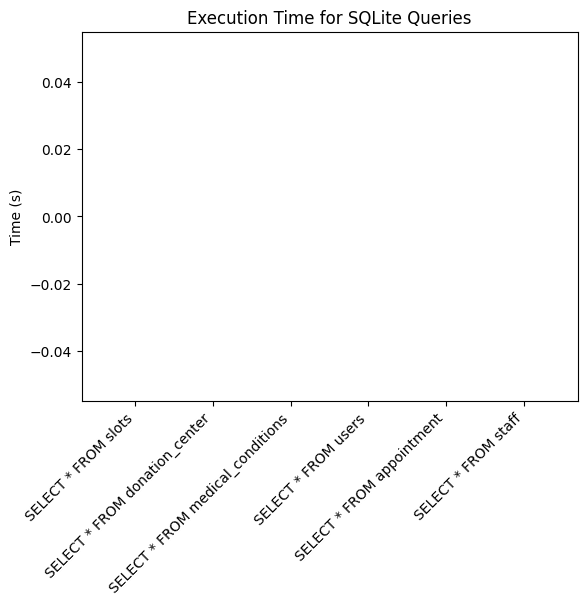

In [9]:
#Graph visualization
import time
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def measure_query_2(query):
    start_time = time.monotonic()
    conn = sqlite3.connect('../blood_donation.db')
    cursor = conn.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(result, columns=columns)
    conn.close()
    end_time = time.monotonic()
    elapsed_time = end_time - start_time
    return {'query': query, 'time': elapsed_time, 'result': df}

queries = ['SELECT * FROM slots', 'SELECT * FROM donation_center', 'SELECT * FROM medical_conditions', 'SELECT * FROM users', 'SELECT * FROM appointment', 'SELECT * FROM staff']
results = [measure_query_2(q) for q in queries]
times = []
for r in results:
    if r['result'].empty:
        times.append(0)
    else:
        times.append(r['time'])

plt.bar(range(len(queries)), times)
plt.xticks(range(len(queries)), queries, rotation=45, ha='right')
plt.ylabel('Time (s)')
plt.title('Execution Time for SQLite Queries')
plt.show()
